# Error backpropagation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
np.set_printoptions(suppress = True, precision = 3)

## Data

In [3]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [4]:
y = np.array([0., 1., 1., 0.]).reshape(4, 1)

y

array([[0.],
       [1.],
       [1.],
       [0.]])

In [5]:
np.random.seed(2045)
W1 = np.random.rand(3, 4)

W1

array([[0.844, 0.886, 0.139, 0.061],
       [0.192, 0.532, 0.155, 0.827],
       [0.92 , 0.015, 0.49 , 0.692]])

In [6]:
np.random.seed(2046)
W2 = np.random.rand(4)

W2 = W2.reshape(4, 1)
W2

array([[0.895],
       [0.596],
       [0.436],
       [0.153]])

In [7]:
np.random.seed(2045)
y_hat = np.random.rand(4).reshape(4, 1)

y_hat

array([[0.844],
       [0.886],
       [0.139],
       [0.061]])

In [8]:
Layer1 = np.ones([4, 4])

Layer1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## 함수 정의

In [9]:
# sigmoid
def sigmoid(x):
    y_hat = 1 / (1 + np.exp(-x))
    return y_hat

In [10]:
def d_sigmoid(x):
    dy = x * (1.0 - x)
    return dy

In [11]:
# loss function
def loss_function(y, y_hat):
    Loss = -np.mean((y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
    return Loss 

## forward prop

In [12]:
def forwardProp(X, W1, Layer1, W2, y_hat):
    Layer1 = sigmoid(np.dot(X, W1))
    y_hat = sigmoid(np.dot(Layer1, W2))

    return Layer1, y_hat

## back prop

In [13]:
def backProp(X, y, y_hat, Layer1, W1, W2):
    d_W2 = np.dot(Layer1, ((y_hat - y) * d_sigmoid(y_hat)))

    d_W1 = np.dot(((y_hat - y) * d_sigmoid(y_hat)), np.transpose(W2))
    d_W1 = d_W1 * d_sigmoid(Layer1)
    d_W1 = np.dot(np.transpose(X), d_W1)

    W1 = W1 - 0.8 * d_W1
    W2 = W2 - 0.8 * d_W2

    return y_hat, Layer1, W1, W2

## Gradient descent

In [14]:
Loss_Record = []

In [15]:
for k in range(0, 2000):
    Layer1, y_hat = forwardProp(X, W1, Layer1, W2, y_hat)
    y_hat, Layer1, W1, W2 = backProp(X, y, y_hat, Layer1, W1, W2)
    
    Loss_Record.append(loss_function(y, y_hat))

In [16]:
W1

array([[ 4.249, -3.19 ,  5.47 ,  2.429],
       [ 3.185, -3.703,  6.202,  2.731],
       [-5.472,  0.857, -2.302, -3.605]])

In [17]:
W2

array([[-2.247],
       [-5.244],
       [ 6.988],
       [-9.85 ]])

In [18]:
y_hat

array([[0.035],
       [0.969],
       [0.968],
       [0.042]])

## visualization

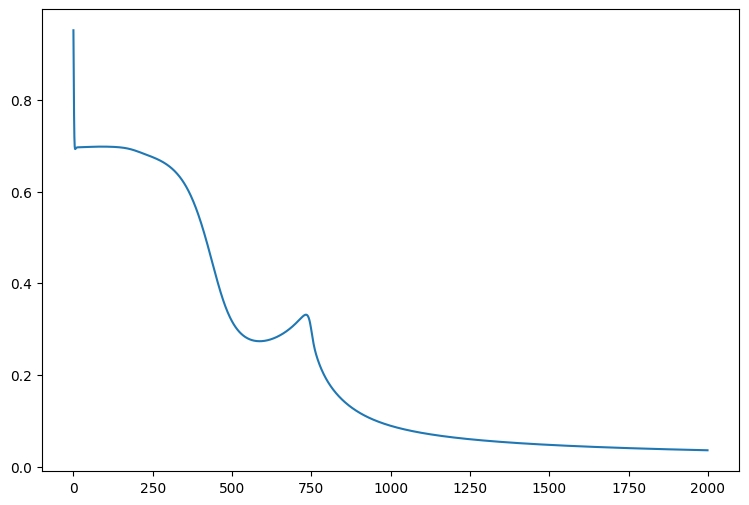

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.plot(Loss_Record)
plt.show()